In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import os
os.chdir('c:\\Users\\TKW\\desktop')
os.getcwd()

'c:\\Users\\TKW\\desktop'

In [3]:
data = pd.read_excel("youtuber1.xlsx")
data.head(10)

,youtuber,influencer,subs,ave_views,total_videos,growth_views,growth_subs,frequency,duration,male,female,endorse
0,Timothy DeLaGhetto,Y,3884157,366811,513,3801383,31477,3,725,63,37,5004
1,Tina Yong,Y,2551141,318073,308,668976,3360,3,994,9,91,4537
2,Fung Brothers,N,1932227,137917,697,4699691,15539,10,791,79,21,2897
3,LeendaDProductions,Y,1168971,513994,121,3886985,10675,2,282,47,53,6635
4,yourchonny,N,958043,228136,140,1052173,4054,1,479,73,27,5345
5,Yumi King,N,849160,9696,862,1240734,2415,7,437,7,93,170
6,FruityPoppin,Y,731102,577435,20,757206,12442,1,503,31,69,6039
7,Megan Bowen,Y,695539,150385,438,1136660,2218,3,731,10,90,1288
8,Stephanie Soo,Y,512490,157799,323,8886292,44830,24,2233,12,88,8089
9,Joe Jitsukawa,N,486712,54706,694,964615,2603,4,1517,68,32,778


- **youtuber**: name of the YouTube channel;
- **influencer**: whether the person running the channel identifies as a social media "influencer" (Y/N);
- **subs**: number of channel subcribers;
- **ave_views**: average view count across all videos;
- **total_videos**: total number of videos released;
- **growth_subs**: number of subscribers to the channel gained in the past 30 days;
- **frequency**: average number of videos put out per month (30 days);
- **duration**: average video length (in seconds);
- **male**: percentage of viewers that are male;
- **female**: percentage of viewers that are female;
- **endorse**: estimated endorsement cost. **dependent variable**.

*All values are correct as of 18 Nov 2018.*

Endorsement cost refers to the estimated cost for the insertion of promotional content for a marketer's product, for a significant proportion of a video (at least 30 seconds). In our context, this refers to the estimated cost required for a YouTube channel to promote our website in their videos.

## Linear Model
We assume that the dependent variable is linearly related with all the independent variables as mentioned above.

We run a linear regression, with *endorse* as the dependent variable, and use **backward elimination** to simplify the model.

In [4]:
# Start with all available predictors
model_all = smf.ols('endorse ~ C(influencer) + subs + ave_views + total_videos + growth_views + growth_subs + frequency + duration + male', data=data).fit()
model_all.pvalues

Intercept             0.904575
C(influencer)[T.Y]    0.274512
subs                  0.222041
ave_views             0.007964
total_videos          0.083001
growth_views          0.547457
growth_subs           0.381653
frequency             0.037372
duration              0.487042
male                  0.359243
dtype: float64

In [5]:
# Remove 'growth_views'
model_1 = smf.ols('endorse ~ C(influencer) + subs + ave_views + total_videos + growth_subs + frequency + duration + male', data=data).fit()
model_1.pvalues

Intercept             0.956965
C(influencer)[T.Y]    0.277265
subs                  0.215648
ave_views             0.005348
total_videos          0.060719
growth_subs           0.172427
frequency             0.021478
duration              0.464596
male                  0.407422
dtype: float64

In [6]:
# Remove 'duration'
model_2 = smf.ols('endorse ~ C(influencer) + subs + ave_views + total_videos + growth_subs + frequency + male', data=data).fit()
model_2.pvalues

Intercept             0.807562
C(influencer)[T.Y]    0.269548
subs                  0.227658
ave_views             0.004284
total_videos          0.056233
growth_subs           0.180471
frequency             0.010613
male                  0.447775
dtype: float64

In [7]:
# Remove 'male'
model_3 = smf.ols('endorse ~ C(influencer) + subs + ave_views + total_videos + growth_subs + frequency', data=data).fit()
model_3.pvalues

Intercept             0.184078
C(influencer)[T.Y]    0.110276
subs                  0.184263
ave_views             0.003439
total_videos          0.027175
growth_subs           0.235776
frequency             0.010836
dtype: float64

In [8]:
# Remove 'growth_subs'
model_4 = smf.ols('endorse ~ C(influencer) + subs + ave_views + total_videos + frequency', data=data).fit()
model_4.pvalues

Intercept             0.157881
C(influencer)[T.Y]    0.126966
subs                  0.412634
ave_views             0.005138
total_videos          0.049637
frequency             0.001515
dtype: float64

In [9]:
# Remove 'subs'
model_5 = smf.ols('endorse ~ C(influencer) + ave_views + total_videos + frequency', data=data).fit()
model_5.pvalues

Intercept             0.227546
C(influencer)[T.Y]    0.173295
ave_views             0.000158
total_videos          0.045334
frequency             0.001499
dtype: float64

In [10]:
# Remove 'C(influencer)'
model_6 = smf.ols('endorse ~ ave_views + total_videos + frequency', data=data).fit()
model_6.pvalues

Intercept       0.623960
ave_views       0.000251
total_videos    0.115043
frequency       0.002814
dtype: float64

In [11]:
# Remove 'total_videos'
model_7 = smf.ols('endorse ~ ave_views + frequency', data=data).fit()
model_7.pvalues

Intercept    0.584205
ave_views    0.000090
frequency    0.007367
dtype: float64

We get a simplified model with the predictors *ave_views* and *frequency*, with p-values below 0.05.

In [12]:
model = smf.ols('endorse ~ ave_views + frequency', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                endorse   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     14.79
Date:                Thu, 22 Nov 2018   Prob (F-statistic):           0.000190
Time:                        15:29:12   Log-Likelihood:                -177.53
No. Observations:                  20   AIC:                             361.1
Df Residuals:                      17   BIC:                             364.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -476.1151    853.450     -0.558      0.5

In [13]:
# Analysis of the coefficients

print('For every increase in average views by', round(1/model.params['ave_views'], 3),
      ', endorsement cost increases by 1 .')
print('For every increase in monthly video frequency by 1', ', endorsement cost increases by',
     round(model.params['frequency'], 3), '.')

For every increase in average views by 70.088 , endorsement cost increases by 1 .
For every increase in monthly video frequency by 1 , endorsement cost increases by 248.789 .


## Model Application
Using our linear model, we can now estimate the endorsement costs required in collaborating with various potential YouTube channels.

In [14]:
data_new = pd.read_excel("youtuber2.xlsx")
data_new.head(10)

,youtuber,ave_views,frequency
0,skinnyindonesian24,317581,4
1,Sacha Stevenson,238294,3
2,Raditya Dika,1176139,8
3,LASTDAY Production,721902,2
4,MiawAug,306310,24
5,Bayu Skak,1241237,1
6,Kaesang,1202467,1
7,Gita Savitri Devi,142931,12
8,Gen Halilintar,1789294,8


*All values are correct as of 18 Nov 2018.*

In [15]:
beta1 = model.params['ave_views']
beta2 = model.params['frequency']

data_new['endorse'] = round((data_new['ave_views'] * beta1 + data_new['frequency'] * beta2), 2)
data_new.head(10)

,youtuber,ave_views,frequency,endorse
0,skinnyindonesian24,317581,4,5526.31
1,Sacha Stevenson,238294,3,4146.28
2,Raditya Dika,1176139,8,18771.13
3,LASTDAY Production,721902,2,10797.47
4,MiawAug,306310,24,10341.27
5,Bayu Skak,1241237,1,17958.41
6,Kaesang,1202467,1,17405.25
7,Gita Savitri Devi,142931,12,5024.76
8,Gen Halilintar,1789294,8,27519.45


## Checks
We check for any limitations of our model.

### Linearity
It was assumed that the dependent variable is linearly related with all the independent variables. We check whether the predictors in our simplified model are linearly related with the dependent variable.

R2 is 0.4364663531267596


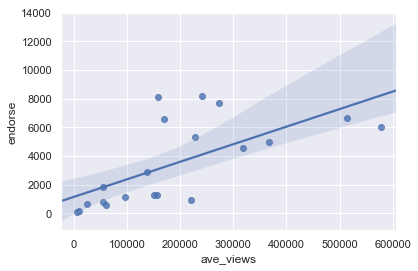

In [16]:
sns.regplot(data['ave_views'], data['endorse'])
R2_1 = np.corrcoef(data['ave_views'], data['endorse'])**2
print('R2 is', R2_1[0][1])

R2 is 0.07755731195379587


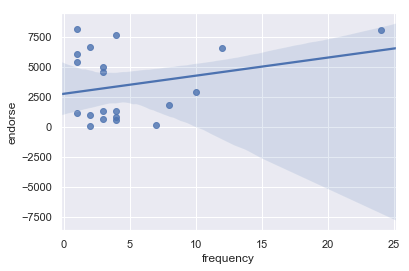

In [17]:
sns.regplot(data['frequency'], data['endorse'])
R2_1 = np.corrcoef(data['frequency'], data['endorse'])**2
print('R2 is', R2_1[0][1])

Both predictors are not strongly linearly correlated with the dependent variable by themselves.

### Multicollinearity
We check for any correlation between our two dependent variables.

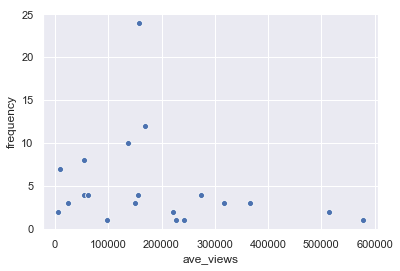

In [18]:
sns.scatterplot(data['ave_views'], data['frequency'])

In [19]:
R2_dependent = np.corrcoef(data['ave_views'], data['frequency'])**2
print('R2 of the two dependent variables is', R2_dependent[0][1])

R2 of the two dependent variables is 0.05487948737358636


The R2 for *ave_views* and *frequency* is low, hence correlation between the two dependent variables is low.

### Normality
The residuals of the regression should follow a normal distribution.

In [20]:
residual = model.fittedvalues.subtract(data['endorse'])

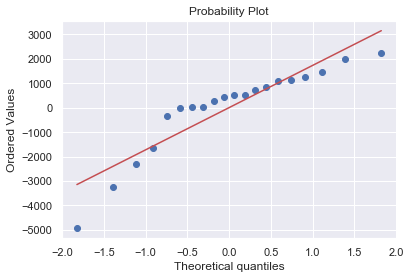

In [21]:
import scipy.stats as stats

stats.probplot(residual, dist='norm', plot=plt)
plt.show()

As seen from the above plot, the residuals do not yield a distribution that more closely resembles that of a normal distribution.

### Homoskedascity
We plot the scatterplot of residuals against predicted values for the dependent variable.

Text(0,0.5,'residuals')

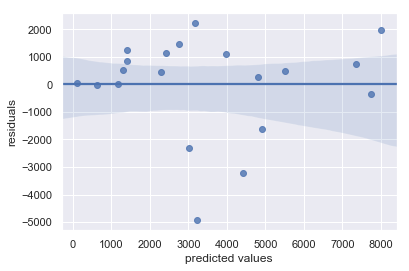

In [22]:
regplot = sns.regplot(model.fittedvalues, residual)
regplot.set_xlabel('predicted values')
regplot.set_ylabel('residuals')

The values are generally homoskedastic.